In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
def analysis(df):
#   Fill null values of Age column with the mean of all values 
    mean_age = round(df['Age'].mean(),2)
    df['Age'].fillna(mean_age, inplace=True)
    df['Fare'].fillna(round(df['Fare'].mean(),4), inplace=True)
    
#   Fill null values of Embarked column with value 'S', as it is the most common value
    df['Embarked'] = df['Embarked'].fillna('S')
    
#   Split the name and add columns Salutation and Surname into the dataframe
    name = df['Name'].str.split(' ', expand=True)
    name[0] = name[0].str.split(',', expand=True)[0]
    df['Salutation'] = name[1]
    df['Surname'] = name[0]
    
    return df

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train = analysis(train)
test = analysis(test)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Allen


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Surname
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,Kelly
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.,Wilkes
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.,Myles
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.,Wirz
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.,Hirvonen


In [10]:
def preprocessing(df):
#   Drop insignificant columns
    df = df.drop(['Name', 'Ticket', 'Cabin','Fare'], axis=1)
#   Encode the categorical data
    enc = LabelEncoder()
    cols = ['Sex','Embarked','Salutation','Surname']
    for col in cols:
        if col in df.columns:
            df[col] = enc.fit_transform(df[col])
    
    return df

In [11]:
train = preprocessing(train)
test = preprocessing(test)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Salutation,Surname
0,1,0,3,1,22.0,1,0,2,17,73
1,2,1,1,0,38.0,1,0,0,18,136
2,3,1,3,0,26.0,0,0,2,14,251
3,4,1,1,0,35.0,1,0,2,18,198
4,5,0,3,1,35.0,0,0,2,17,11


In [13]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Salutation,Surname
0,892,3,1,34.5,0,0,1,9,170
1,893,3,0,47.0,1,0,2,10,337
2,894,2,1,62.0,0,0,1,9,229
3,895,3,1,27.0,0,0,2,9,342
4,896,3,0,22.0,1,1,2,10,149


In [14]:
x_train = train.drop(['PassengerId','Survived'], axis = 1)
x_test = test.drop(['PassengerId'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(x_train,train['Survived'],test_size=0.33,random_state = 64)

In [15]:
rf_default = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='auto', random_state=64)
rf_default.fit(X_train, Y_train)
rfd_pred = rf_default.predict(X_test)
print(classification_report(Y_test,rfd_pred))
print(accuracy_score(Y_test,rfd_pred))
confusion_matrix(Y_test,rfd_pred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       182
           1       0.81      0.70      0.75       113

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

0.823728813559322


array([[164,  18],
       [ 34,  79]])

In [16]:
rf_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=64)
rf_entropy.fit(X_train, Y_train)
rfe_pred = rf_entropy.predict(X_test)
print(classification_report(Y_test,rfe_pred))
print(accuracy_score(Y_test,rfe_pred))
confusion_matrix(Y_test,rfe_pred)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       182
           1       0.80      0.73      0.76       113

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295

0.823728813559322


array([[161,  21],
       [ 31,  82]])

In [17]:
rf_150 = RandomForestClassifier(n_estimators=150, criterion='gini', max_features='auto', random_state=64)
rf_150.fit(X_train, Y_train)
rf150_pred = rf_150.predict(X_test)
print(classification_report(Y_test,rf150_pred))
print(accuracy_score(Y_test,rf150_pred))
confusion_matrix(Y_test,rf150_pred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       182
           1       0.81      0.70      0.75       113

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295

0.8203389830508474


array([[163,  19],
       [ 34,  79]])

In [18]:
rfe_150 = RandomForestClassifier(n_estimators=150, criterion='entropy', max_features='auto', random_state=64)
rfe_150.fit(X_train, Y_train)
rfe150_pred = rfe_150.predict(X_test)
print(classification_report(Y_test,rfe150_pred))
print(accuracy_score(Y_test,rfe150_pred))
confusion_matrix(Y_test,rfe150_pred)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       182
           1       0.80      0.72      0.76       113

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

0.823728813559322


array([[162,  20],
       [ 32,  81]])

In [19]:
rf150_ent_log = RandomForestClassifier(n_estimators=150, criterion='entropy', max_features='log2', random_state=64)
rf150_ent_log.fit(X_train, Y_train)
rf150_ent_log_pred = rf150_ent_log.predict(X_test)
print(classification_report(Y_test,rf150_ent_log_pred))
print(accuracy_score(Y_test,rf150_ent_log_pred))
confusion_matrix(Y_test,rf150_ent_log_pred)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       182
           1       0.80      0.70      0.75       113

    accuracy                           0.82       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.82      0.82      0.81       295

0.8169491525423729


array([[162,  20],
       [ 34,  79]])

In [20]:
rf_ent_log = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='log2', random_state=64)
rf_ent_log.fit(X_train, Y_train)
rf_ent_log_pred = rf_ent_log.predict(X_test)
print(classification_report(Y_test,rf_ent_log_pred))
print(accuracy_score(Y_test,rf_ent_log_pred))
confusion_matrix(Y_test,rf_ent_log_pred)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       182
           1       0.80      0.69      0.74       113

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

0.8135593220338984


array([[162,  20],
       [ 35,  78]])

In [21]:
test_pred = rf_150.predict(x_test)

In [22]:
output = test['PassengerId'].to_frame()
output['Survived'] = test_pred
output.set_index('PassengerId', inplace=True)
output.to_csv('output_150.csv')

In [23]:
test_pred = rf_ent_log.predict(x_test)

In [24]:
output = test['PassengerId'].to_frame()
output['Survived'] = test_pred
output.set_index('PassengerId', inplace=True)
output.to_csv('output_e_log.csv')

In [25]:
test_pred = rf_default.predict(x_test)

In [26]:
output = test['PassengerId'].to_frame()
output['Survived'] = test_pred
output.set_index('PassengerId', inplace=True)
output.to_csv('output.csv')

In [27]:
import seaborn as sns


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

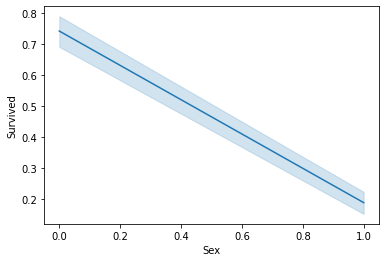

In [28]:
sns.lineplot(train['Sex'], train['Survived'])